In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from prediction_helpers import *

In [3]:
ExE = pd.read_csv('../../extracted_data/ExE_imputed_5.csv', sep=',', index_col=0)
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep=',', index_col=0)
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep=',', index_col=0)
embeddings = pd.read_csv('../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep=',', index_col=0)
embeddings = embeddings.reset_index().set_index('gene_id')

In [4]:
pca_linear_regression = Pipeline([
    ('pca', PCA(n_components=0.9)), 
    ('linear_regression', LinearRegression())
])
pca_linear_regression.name = 'PCA + Linear Regression'

predictive_models_ExE = [ 
    pca_linear_regression,
    Lasso(alpha=0.0001),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_NxN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005),
    Ridge(alpha=10),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

predictive_models_ExN = [ 
    pca_linear_regression,
    Lasso(alpha=0.00005),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42)
]

random.seed(35)
proportion = 0.01

## ExE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.398e-03, tolerance: 5.672e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e-02, tolerance: 2.798e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter


Model: Pipeline
Average R²:   -0.0075
Average RMSE: 0.0733

Model: Lasso
Average R²:   0.2573
Average RMSE: 0.0596

Model: Ridge
Average R²:   0.1787
Average RMSE: 0.0632

Model: RandomForestRegressor
Average R²:   0.3031
Average RMSE: 0.0581


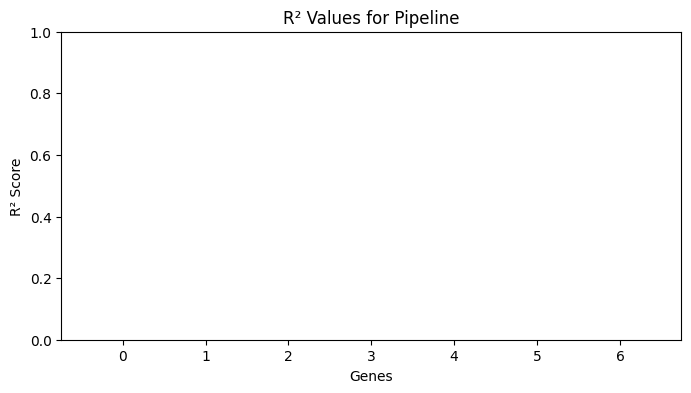

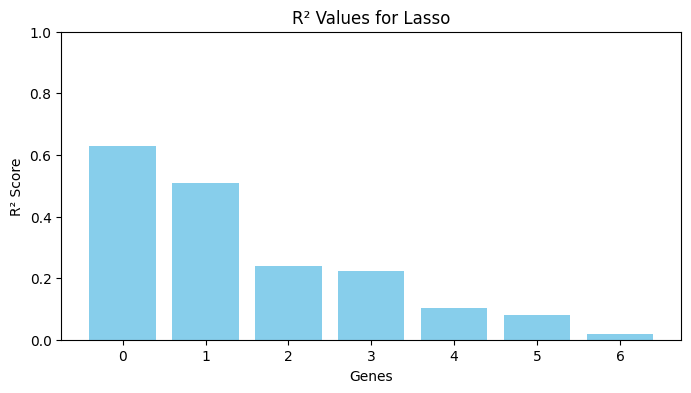

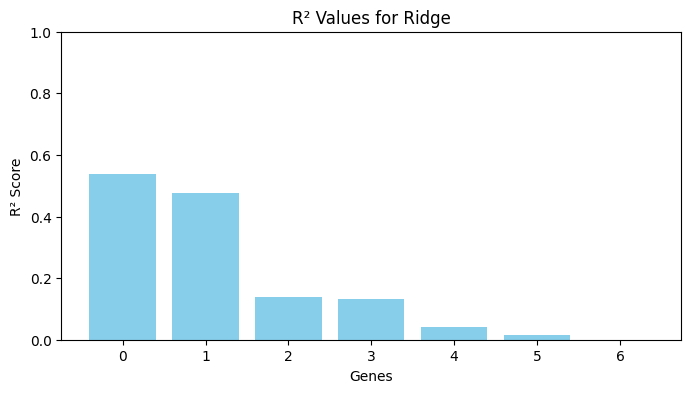

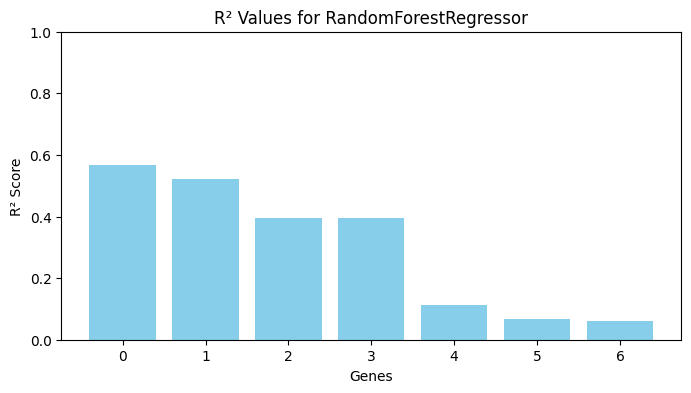

In [5]:
results_ExE = iterate_over_proportion_embeddings(ExE, embeddings, proportion, predictive_models_ExE)
print_results(results_ExE)
plot_results(results_ExE)

## NxN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.176e-02, tolerance: 4.630e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e-02, tolerance: 8.526e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter


Model: Pipeline
Average R²:   -0.0007
Average RMSE: 0.0420

Model: Lasso
Average R²:   0.1620
Average RMSE: 0.0365

Model: Ridge
Average R²:   0.0477
Average RMSE: 0.0396

Model: RandomForestRegressor
Average R²:   0.0200
Average RMSE: 0.0408


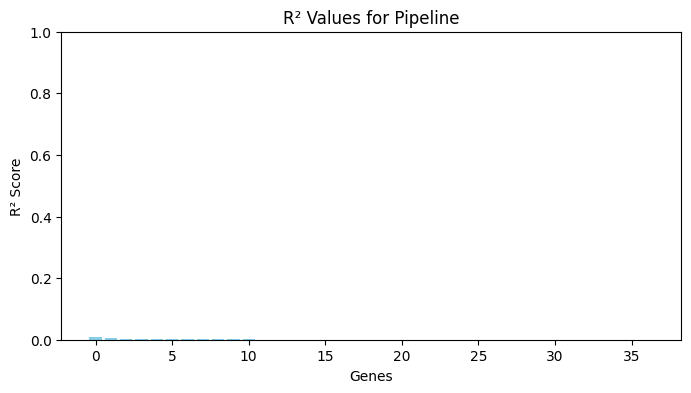

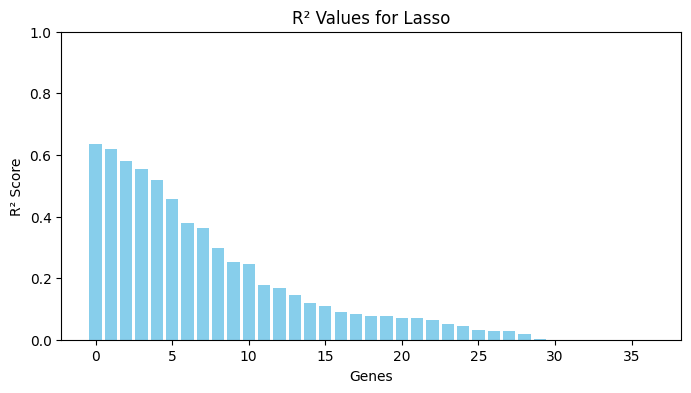

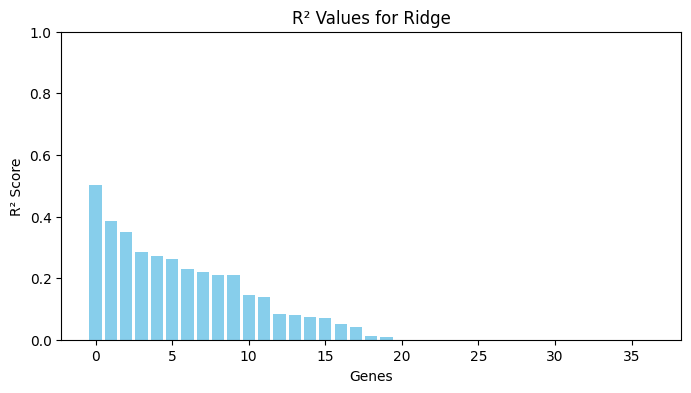

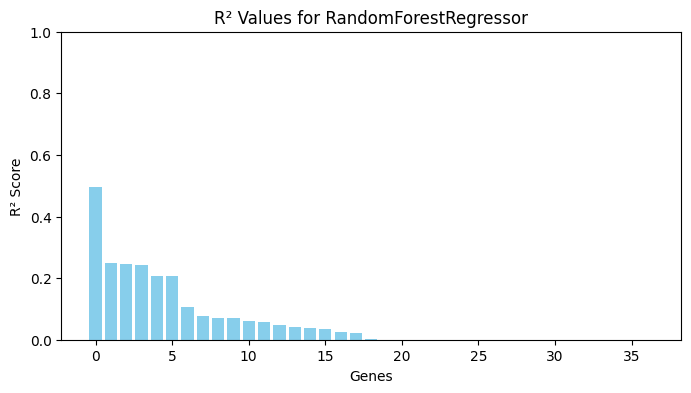

In [6]:
results_NxN = iterate_over_proportion_embeddings(NxN, embeddings, proportion, predictive_models_NxN)
print_results(results_NxN)
plot_results(results_NxN)

## ExN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.774e-02, tolerance: 3.228e-04
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.710e-02, tolerance: 4.513e-04
  model = cd_fast.enet_coordinate_descent(



Model: Pipeline
Average R²:   -0.0022
Average RMSE: 0.0502

Model: Lasso
Average R²:   0.1172
Average RMSE: 0.0446

Model: Ridge
Average R²:   -0.0496
Average RMSE: 0.0494

Model: RandomForestRegressor
Average R²:   0.1876
Average RMSE: 0.0436


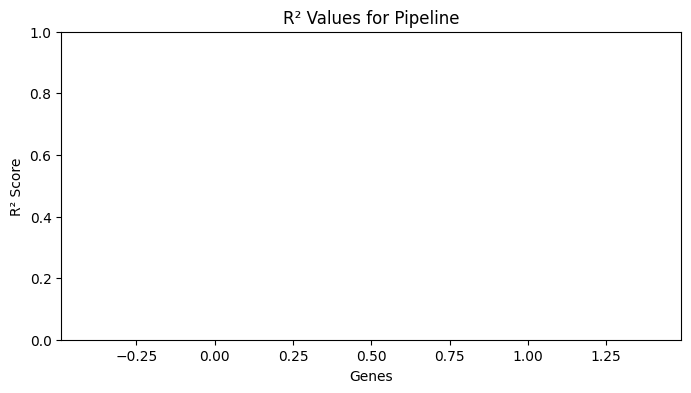

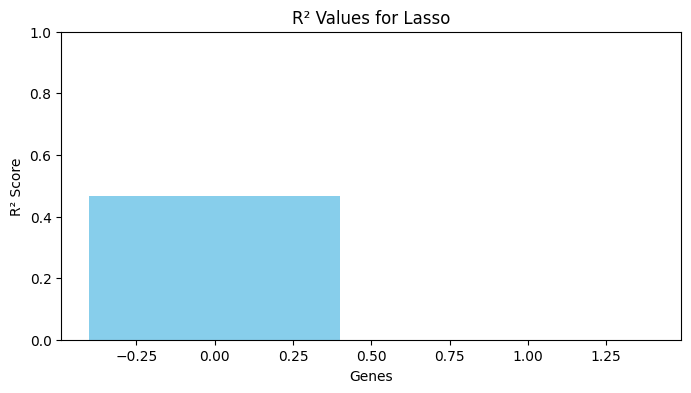

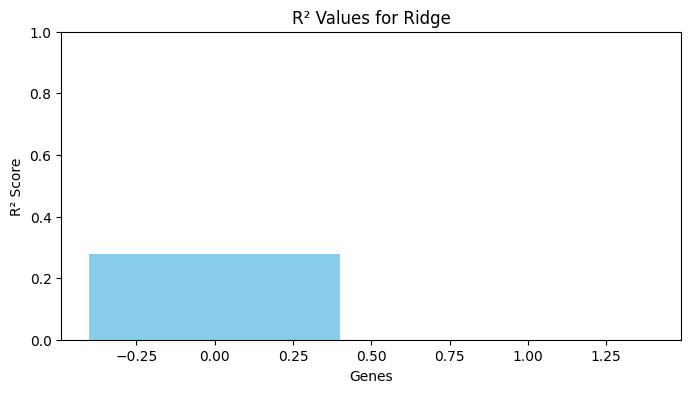

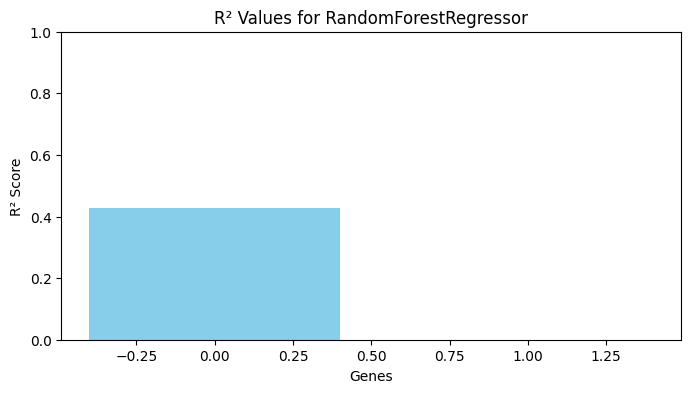

In [7]:
results_ExN = iterate_over_proportion_embeddings(ExN, embeddings, proportion, predictive_models_ExN)
print_results(results_ExN)
plot_results(results_ExN)


## Compilation Date

In [8]:
from datetime import datetime

now = datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2025-04-22 17:52:09
